In [1]:
!pip install -q imdb-sqlite

In [2]:
!pip install pycountry

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=87f2abb40c46be97b5819926130b97a2e15842523638463215b47ed0ebddc208
  Stored in directory: c:\users\luizg\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [1]:
import re
import time
import sqlite3
import pycountry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [7]:
## Carregando os dados
!imdb-sqlite

2022-08-24 17:45:22,051 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-08-24 17:47:00,289 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-08-24 17:48:11,864 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-08-24 17:49:31,583 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-08-24 17:51:15,144 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-08-24 17:51:29,968 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-08-24 17:51:31,539 Populating database: imdb.db
2022-08-24 17:51:31,603 Applying schema
2022-08-24 17:51:31,634 Importing file: downloads\name.basics.tsv.gz
2022-08-24 17:51:31,635 Reading number of rows ...
2022-08-24 17:51:45,193 Inserting rows into table: people

  4%|4         | 508304/11875228 [00:12<04:30, 42083.76 rows/s]


In [2]:
# Conectando o DB
conn = sqlite3.connect("imdb.db")

In [3]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type ='table'",conn)

In [4]:
# Tipo de objetos
type(tabelas)

pandas.core.frame.DataFrame

In [5]:
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [6]:
#Conversão do DF em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [7]:
#Extrai o esquema de listas e tabelas
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print ("Esquema da tabela:", tabela)
    display(resultado)
    print("_"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


____________________________________________________________________________________________________




In [8]:
#Cria uma consulta SQL
consulta1 = ''' SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [9]:
#Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [10]:
#Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,619356
1,short,885803
2,tvEpisode,6907055
3,tvMiniSeries,44818
4,tvMovie,137267
5,tvPilot,2
6,tvSeries,229989
7,tvShort,10637
8,tvSpecial,38036
9,video,264495


In [11]:
#Calcula o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum())*100

In [12]:
display(resultado1)

,type,COUNT,percentual
0,movie,619356,6.754603
1,short,885803,9.660434
2,tvEpisode,6907055,75.327304
3,tvMiniSeries,44818,0.488778
4,tvMovie,137267,1.497013
5,tvPilot,2,0.000022
6,tvSeries,229989,2.508225
7,tvShort,10637,0.116006
8,tvSpecial,38036,0.414815
9,video,264495,2.884543


In [13]:
#Ajusta os labels

#Cria dicionario vazio
others = {}

In [14]:
#filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

In [15]:
# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

In [16]:
# Ajusta o nome
others['type'] = 'others'

In [17]:
# Visualiza
others

{'COUNT': 757177, 'percentual': 8.257658551151325, 'type': 'others'}

In [18]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [19]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [20]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [21]:
# Visualiza
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6907055,75.327304
1,short,885803,9.660434
3,others,757177,8.257659
0,movie,619356,6.754603


In [22]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

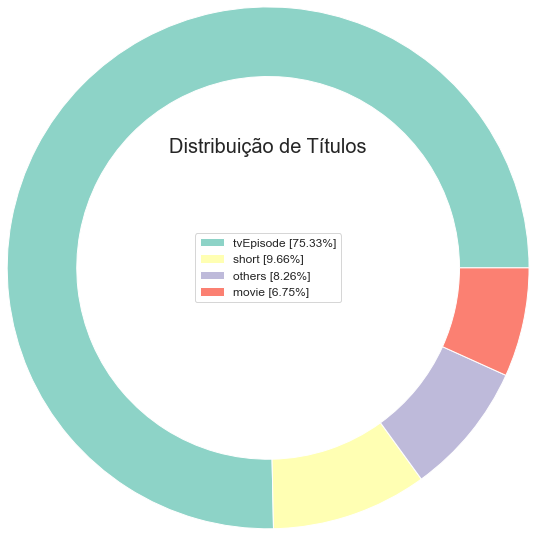

In [23]:
# Plot

# Mapa de cores

cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

In [24]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [29]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [30]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,14162
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1459,"Thriller,Western",43
1460,War,1314
1461,"War,Western",14
1462,Western,5148


In [31]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [32]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

In [33]:
#Cria um vetor usando expressão regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [34]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [35]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [36]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [37]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [39]:
# Cria o DF de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [40]:
# Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1464 non-null   int64
 1   adult        1464 non-null   int64
 2   adventure    1464 non-null   int64
 3   animation    1464 non-null   int64
 4   biography    1464 non-null   int64
 5   comedy       1464 non-null   int64
 6   crime        1464 non-null   int64
 7   documentary  1464 non-null   int64
 8   drama        1464 non-null   int64
 9   family       1464 non-null   int64
 10  fantasy      1464 non-null   int64
 11  film-noir    1464 non-null   int64
 12  game-show    1464 non-null   int64
 13  history      1464 non-null   int64
 14  horror       1464 non-null   int64
 15  music        1464 non-null   int64
 16  musical      1464 non-null   int64
 17  mystery      1464 non-null   int64
 18  n            1464 non-null   int64
 19  news         1464 non-null   int64
 20  reality-

In [41]:
# Drop da coluna n(a consulta nos dados fez ser criado essa coluna n)
generos = generos.drop(columns = 'n', axis = 0)

In [42]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [43]:
# Visualiza
generos_percentual.head(10)

drama          17.964481
comedy         17.008197
documentary    15.846995
adventure      14.822404
action         14.412568
romance        13.319672
crime          13.046448
mystery        12.431694
thriller       12.295082
horror         12.295082
dtype: float64

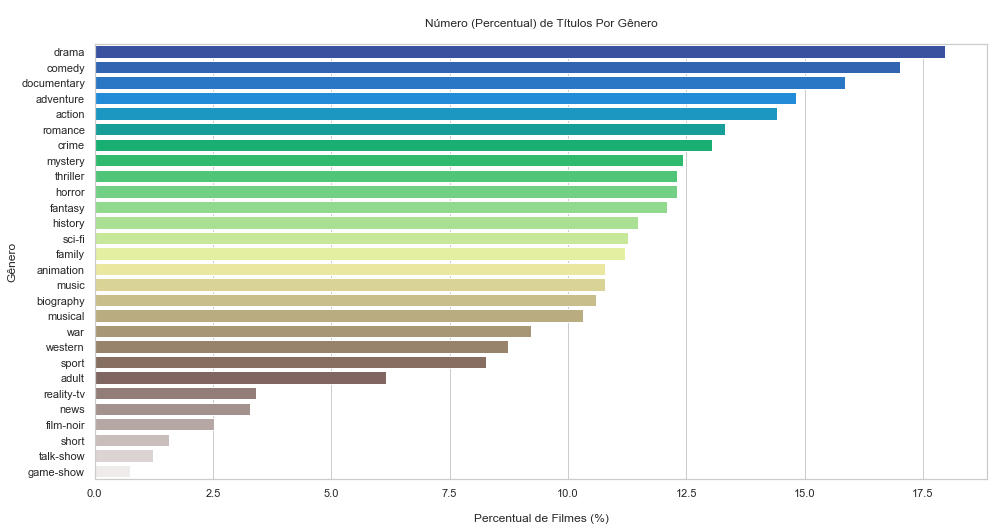

In [44]:
#Geraação do gráfico (Plot)
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

In [49]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2023 AND type = 'movie'
            '''

In [50]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [51]:
# Visualiza
display(resultado3)

,rating,genres
0,5.2,Romance
1,3.7,\N
2,6.0,"Action,Adventure,Biography"
3,4.0,Drama
4,4.1,Drama
...,...,...
281234,5.8,Thriller
281235,6.4,"Drama,History"
281236,3.8,"Adventure,History,War"
281237,8.3,Drama


In [52]:
#Cria uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [53]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [54]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [55]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [56]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [57]:
# Prepara o DF final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [58]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,29152,5.80
1,adult,4395,5.80
2,adventure,17648,6.00
3,animation,4832,6.60
4,biography,8587,7.00
5,comedy,69430,6.00
6,crime,24068,6.10
7,documentary,42295,7.30
8,drama,124593,6.30
9,family,10845,6.30


In [59]:
# Drop do índice 18 (news)
# essa informação não é relevante para a pergunta em questão
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [60]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

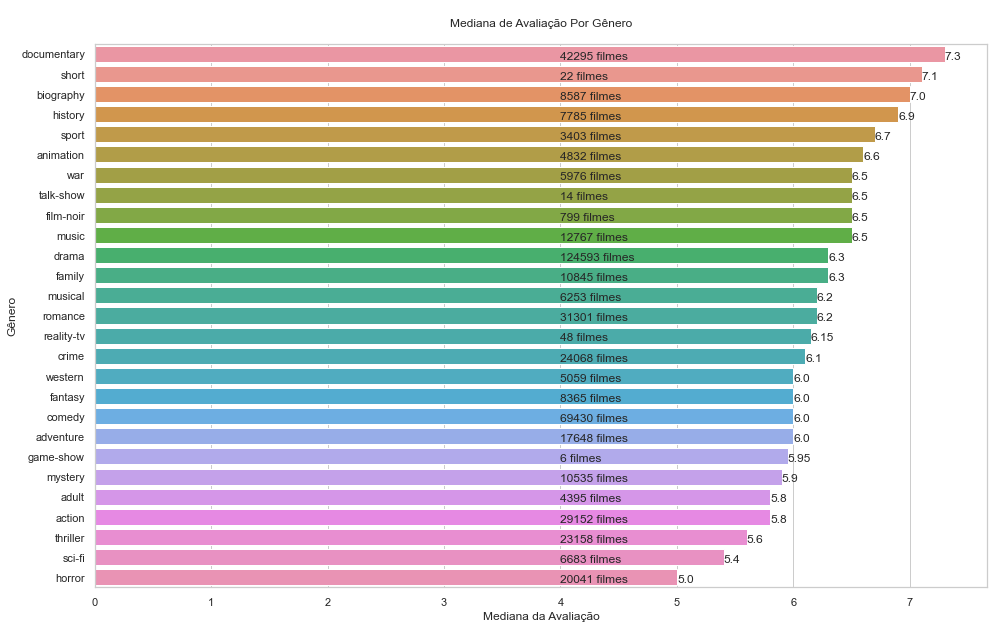

In [61]:
#Gerção do gráfico (Plot)

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

In [62]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [63]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [64]:
display(resultado4)

,Rating,premiered
0,5.2,1894
1,6.2,1896
2,4.4,1897
3,3.9,1899
4,3.2,1899
...,...,...
281234,7.8,2022
281235,6.8,2022
281236,5.3,2022
281237,4.2,2022


In [65]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [66]:
type(ratings)

list

In [67]:
ratings[1:10]

[6.2, 4.4, 3.55, 5.35, 4.1, 3.4, 4.0, 5.3, 3.8]

In [68]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [69]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

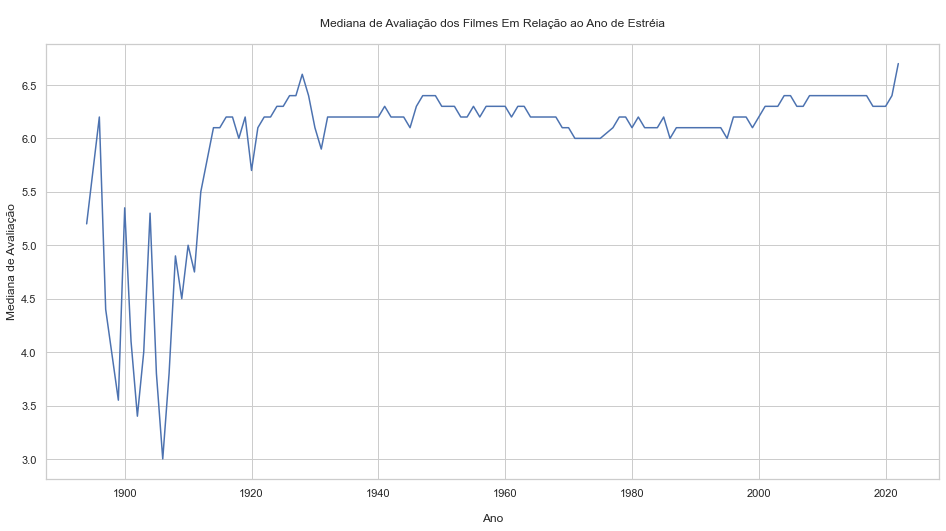

In [70]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

In [71]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [72]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [73]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9169386,"Action,Drama,Family"
9169387,"Action,Drama,Family"
9169388,"Action,Drama,Family"
9169389,Short


In [74]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [75]:
# Faz a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [76]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [77]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

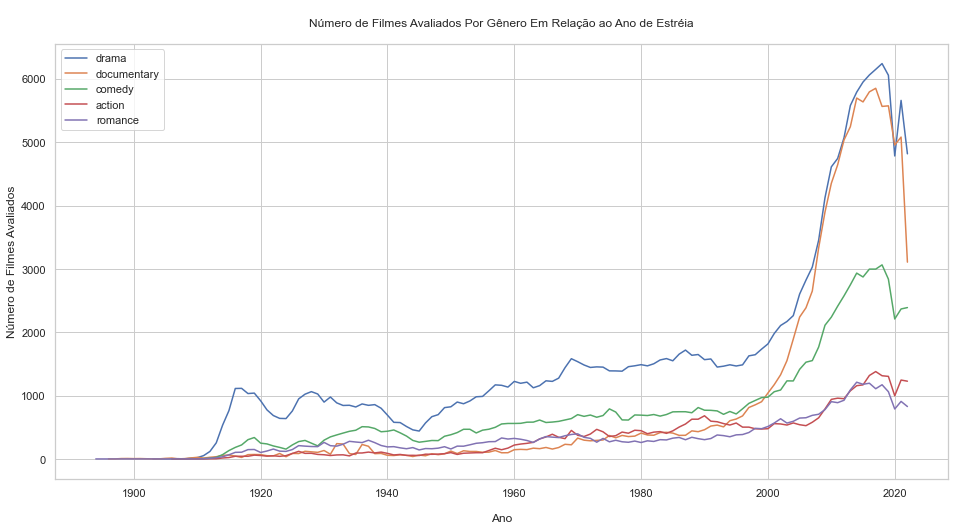

In [78]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

In [79]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [80]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [81]:
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
390818,123
390819,57
390820,100
390821,116


In [82]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [85]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [87]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [88]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [89]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [90]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [91]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

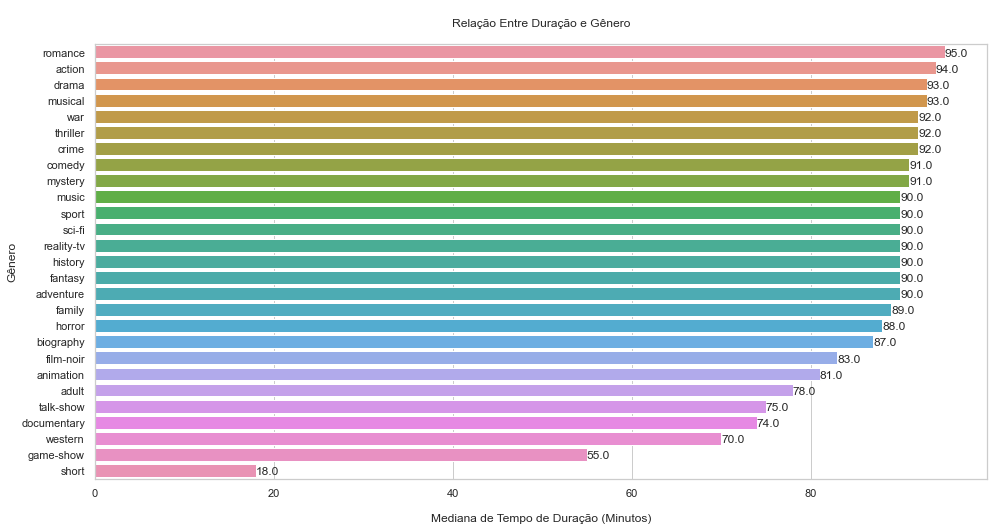

In [92]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

In [93]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [94]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [95]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,7126
2,AF,110
3,AG,12
4,AL,1296
...,...,...
229,YUCS,153
230,ZA,7712
231,ZM,17
232,ZRCD,2


In [96]:
# Shape
resultado8.shape

(234, 2)

In [97]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [98]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [99]:
# Prepara o DF
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [100]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [101]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,316351
65,United Kingdom,161025
96,Japan,93100
63,France,85991
89,India,85569
32,Canada,81105
47,Germany,72438
58,Spain,67043
93,Italy,66565
26,Brazil,66434


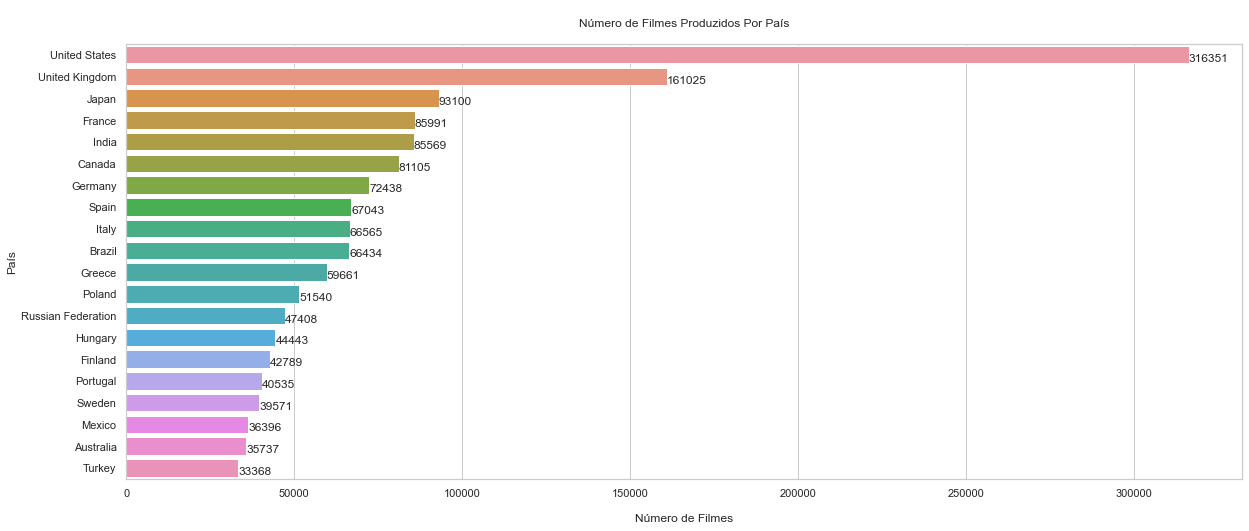

In [102]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

In [112]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 50000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [113]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [114]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,12 Angry Men,"Crime,Drama",9.0
3,The Godfather Part II,"Crime,Drama",9.0
4,Schindler's List,"Biography,Drama,History",9.0
5,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
6,The Dark Knight,"Action,Crime,Drama",9.0
7,Pulp Fiction,"Crime,Drama",8.9
8,Jai Bhim,"Crime,Drama,Mystery",8.9
9,"The Good, the Bad and the Ugly","Adventure,Western",8.8


In [109]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 50000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [110]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [111]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Sadak 2,"Action,Drama",1.1
2,Justin Bieber: Never Say Never,"Documentary,Music",1.6
3,Radhe,"Action,Crime,Thriller",1.9
4,Disaster Movie,"Comedy,Sci-Fi",1.9
5,Enes Batur,Comedy,2.0
6,Son of the Mask,"Comedy,Family,Fantasy",2.2
7,Epic Movie,"Adventure,Comedy,Fantasy",2.4
8,Battlefield Earth,"Action,Adventure,Sci-Fi",2.5
9,Laxmii,"Action,Comedy,Horror",2.6
